### Import Dependencies

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import fnmatch

### Specify Data Folder and Check Available Data

In [9]:
files = os.listdir(DATA_PATH)

# Convert list of file names to DataFrame
df = pd.DataFrame(files, columns=['File Name'])

# Display df
from IPython.display import display
display(df)

,File Name
0,PandaX-4T_SI_2021_official_corrected.csv
1,lz_SDn_proj_2019.csv
2,darwin_SI_proj_2016.csv
3,xenon1t_migdal_si.csv
4,xenon1t_s2only_si_limit.csv
5,LZ_SR1_SpinDependentNeutron_Corrected.csv
6,xenonnt_performance_vs_exposure_50gev.csv
7,format.sh
8,NeutrinoFogXe_SpinIndependent.csv
9,PandaX-4T_SI_2021_official.csv


### Data Searching

In [10]:
%run ../plot_tools.py

In [23]:
# List of experiment names
experiments = ["XENONNT_2023", 
               "XENON1T_Migdal_SI",
               "LZ_SR1_SpinIndependent", 
               "DarkSide50", 
               "CRESSTII", 
               "CDMS", 
               "NeutrinoFogXe_SpinIndependent"]

# Dictionary to store DataFrames
dfs = {}

# Iterate over experiment names and get DataFrames
for experiment in experiments:
    dfs[experiment] = get_limit_df(experiment)

Found file: XENONnT_2023_WIMP_SI.csv
Found file: xenon1t_migdal_si.csv
Found file: LZ_SR1_SpinIndependent.csv
Found file: darkside50_ul.csv
Found file: CRESSTII_SI_2016_v2.csv
Found file: CDMSLite2018_SI.csv
Found file: NeutrinoFogXe_SpinIndependent.csv


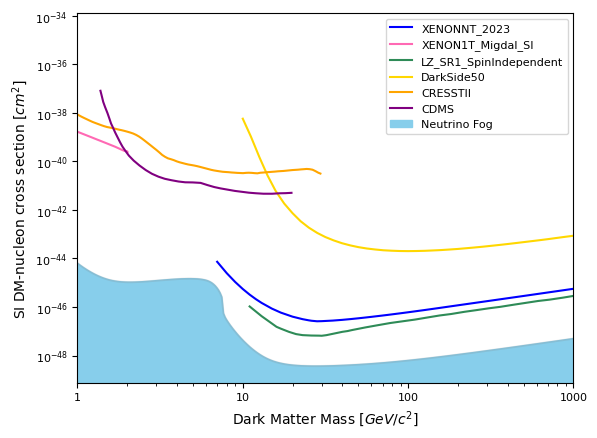

In [29]:
# Reset the rc parameters to their default values
plt.rcdefaults()

# Set the global font size
plt.rcParams['font.size'] = 8

# Clear the current figure
plt.clf()

# Define a dictionary for colors corresponding to each experiment
colors = {"XENONNT_2023": "blue",
          "XENON1T_Migdal_SI": "hotpink",
          "LZ_SR1_SpinIndependent": "seagreen",
          "DarkSide50": "gold",
          "CRESSTII": "orange",
          "CDMS": "purple",
          "NeutrinoFogXe_SpinIndependent": "grey"}

# Iterate over experiments and plot the limit from each one
for experiment, df in dfs.items():
    # For neutrino fog, fill the area under the curve
    if experiment == "NeutrinoFogXe_SpinIndependent":
        plt.plot(df.mass, df.limit, color=colors[experiment], alpha=0.2)
        plt.fill_between(df.mass, df.limit, color='skyblue', label="Neutrino Fog")
    else:
        plt.plot(df.mass, df.limit, color=colors[experiment], label=experiment)


# Set the x and y scales to logarithmic
plt.xscale("log")
plt.yscale("log")

# Set the x and y axis labels
plt.xlabel("Dark Matter Mass $[GeV/{c^2}]$", fontsize=10)
plt.ylabel("SI DM-nucleon cross section $[cm^2]$", fontsize=10)

# Set custom x-axis ticks and labels
plt.xlim(1,1000)
custom_ticks = np.array([1, 10, 100, 1000])
custom_labels = np.round(custom_ticks, 0).astype(int)
plt.xticks(custom_ticks, custom_labels)

# Add a legend
plt.legend()

# Display the plot
plt.show()